In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
import pandas as pd
df=pd.read_excel('Train (3).xlsx',sheet_name='batsman')

In [5]:
df

,Batting and Fielding,Mat,No,Runs,HS,Ave,BF,SR,100,50,4s,6s,CT,ST,player_name,Top_5
0,2018,13,8,430,79*,86,277,155.23,0,3,22,29,6,2,MS Dhoni,0
1,2017,16,4,290,61*,26.36,250,116.00,0,1,15,16,10,3,MS Dhoni,0
2,2016,14,5,284,64*,40.57,210,135.23,0,1,18,14,8,4,MS Dhoni,0
3,2015,17,5,372,53,31,305,121.96,0,1,27,17,8,3,MS Dhoni,0
4,2014,16,10,371,57*,74.2,250,148.40,0,1,22,20,3,1,MS Dhoni,0
5,2013,18,5,461,67*,41.9,283,162.89,0,4,32,25,15,2,MS Dhoni,0
6,2012,19,5,358,51*,29.83,278,128.77,0,1,26,9,12,2,MS Dhoni,0
7,2011,16,4,392,70*,43.55,247,158.70,0,2,25,23,5,5,MS Dhoni,0
8,2010,13,2,287,66*,31.88,210,136.66,0,2,26,8,5,6,MS Dhoni,0
9,2009,14,5,332,58*,41.5,261,127.20,0,2,22,9,4,4,MS Dhoni,1


In [6]:
import re

In [61]:

df.rename(columns={'Batting and Fielding': 'Year'}, inplace=True)

#Copying observations where year is not 2018 as training data

train = df[df['Year'] != 2018]

#Copying observations where year is 2018 as test data

test = df[df['Year'] == 2018]

#Deleting special chars from data --> HS and Ave

for i in range(len(train)):
    train['HS'].iloc[i] = int(re.sub("\D", "", str(train['HS'].iloc[i])))

for i in range(len(test)):
    test['HS'].iloc[i] = int(re.sub("\D", "", str(test['HS'].iloc[i])))
    
    
for i in range(len(train)):
    if train['Ave'].iloc[i] == '-':
        train['Ave'].iloc[i] = 0

for i in range(len(test)):
    if test['Ave'].iloc[i] == '-':
        test['Ave'].iloc[i] = 0



/home/nbuser/anaconda3_501/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__

In [8]:
train

,Year,Mat,No,Runs,HS,Ave,BF,SR,100,50,4s,6s,CT,ST,player_name,Top_5
1,2017,16,4,290,61,26.36,250,116.00,0,1,15,16,10,3,MS Dhoni,0
2,2016,14,5,284,64,40.57,210,135.23,0,1,18,14,8,4,MS Dhoni,0
3,2015,17,5,372,53,31,305,121.96,0,1,27,17,8,3,MS Dhoni,0
4,2014,16,10,371,57,74.2,250,148.40,0,1,22,20,3,1,MS Dhoni,0
5,2013,18,5,461,67,41.9,283,162.89,0,4,32,25,15,2,MS Dhoni,0
6,2012,19,5,358,51,29.83,278,128.77,0,1,26,9,12,2,MS Dhoni,0
7,2011,16,4,392,70,43.55,247,158.70,0,2,25,23,5,5,MS Dhoni,0
8,2010,13,2,287,66,31.88,210,136.66,0,2,26,8,5,6,MS Dhoni,0
9,2009,14,5,332,58,41.5,261,127.20,0,2,22,9,4,4,MS Dhoni,1
10,2008,16,4,414,65,41.4,310,133.54,0,2,38,15,6,0,MS Dhoni,1


In [9]:
train.drop(['Top_5'],axis=1,inplace=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
train

,Year,Mat,No,Runs,HS,Ave,BF,SR,100,50,4s,6s,CT,ST,player_name
1,2017,16,4,290,61,26.36,250,116.00,0,1,15,16,10,3,MS Dhoni
2,2016,14,5,284,64,40.57,210,135.23,0,1,18,14,8,4,MS Dhoni
3,2015,17,5,372,53,31,305,121.96,0,1,27,17,8,3,MS Dhoni
4,2014,16,10,371,57,74.2,250,148.40,0,1,22,20,3,1,MS Dhoni
5,2013,18,5,461,67,41.9,283,162.89,0,4,32,25,15,2,MS Dhoni
6,2012,19,5,358,51,29.83,278,128.77,0,1,26,9,12,2,MS Dhoni
7,2011,16,4,392,70,43.55,247,158.70,0,2,25,23,5,5,MS Dhoni
8,2010,13,2,287,66,31.88,210,136.66,0,2,26,8,5,6,MS Dhoni
9,2009,14,5,332,58,41.5,261,127.20,0,2,22,9,4,4,MS Dhoni
10,2008,16,4,414,65,41.4,310,133.54,0,2,38,15,6,0,MS Dhoni


In [11]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train=train.select_dtypes(include=numerics)

In [12]:
train

,Year,Mat,No,Runs,HS,BF,SR,100,50,4s,6s,CT,ST
1,2017,16,4,290,61,250,116.00,0,1,15,16,10,3
2,2016,14,5,284,64,210,135.23,0,1,18,14,8,4
3,2015,17,5,372,53,305,121.96,0,1,27,17,8,3
4,2014,16,10,371,57,250,148.40,0,1,22,20,3,1
5,2013,18,5,461,67,283,162.89,0,4,32,25,15,2
6,2012,19,5,358,51,278,128.77,0,1,26,9,12,2
7,2011,16,4,392,70,247,158.70,0,2,25,23,5,5
8,2010,13,2,287,66,210,136.66,0,2,26,8,5,6
9,2009,14,5,332,58,261,127.20,0,2,22,9,4,4
10,2008,16,4,414,65,310,133.54,0,2,38,15,6,0


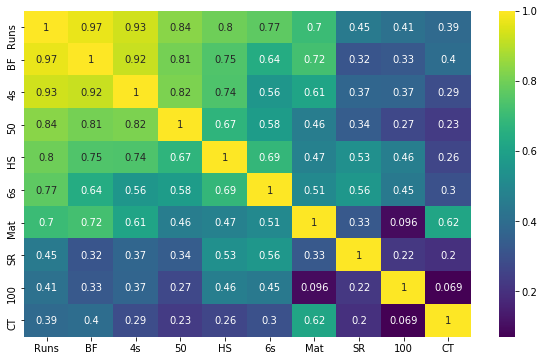

In [13]:
#runs correlation matrix
k = 10 #number of variables for heatmap
cols = train.corr().nlargest(k, 'Runs')['Runs'].index
cm = train[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

# since the run matrix indicates that feature such as BF(ball faced),4s,50,hs,6s are highly corelated we can see thier linear relationship

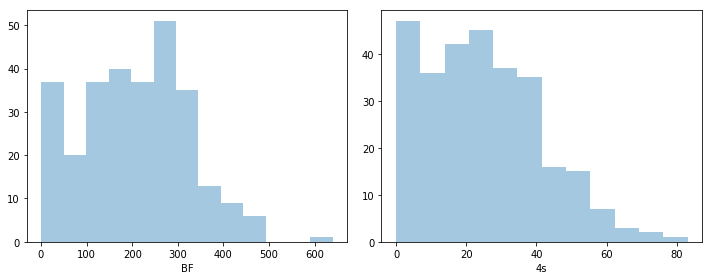

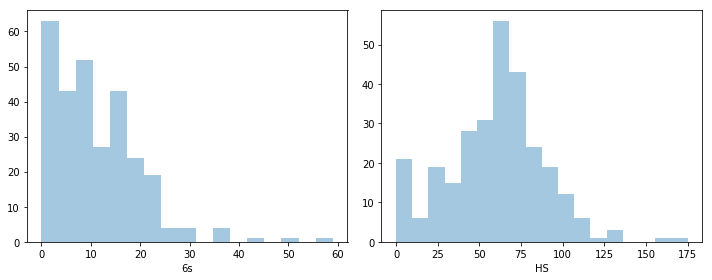

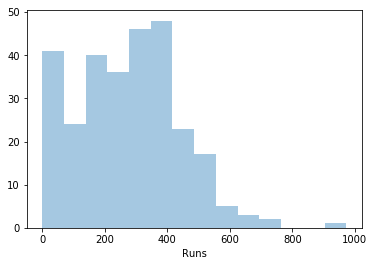

In [15]:
num_cols = ['BF', '4s', '6s', 'HS','Runs']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(train[num_cols[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(train[num_cols[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(train[num_cols[i]], kde=False)

# here we can infer from the above histogram plot is that except HS all other features are right skewed distribution(asymetric distribution)

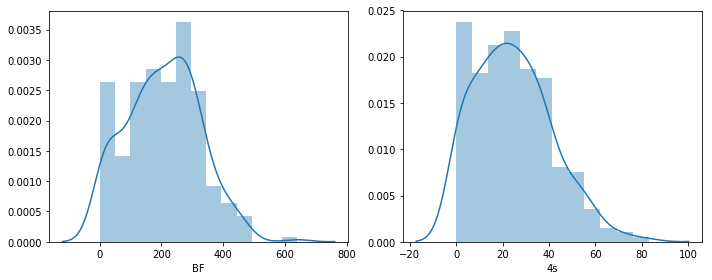

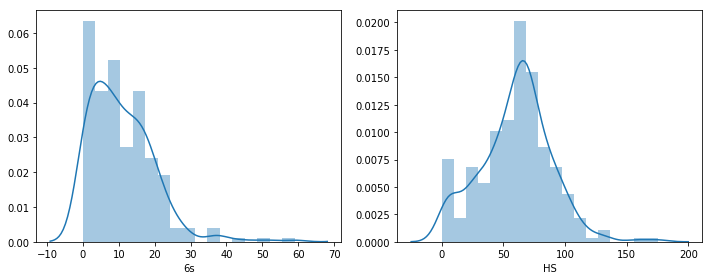

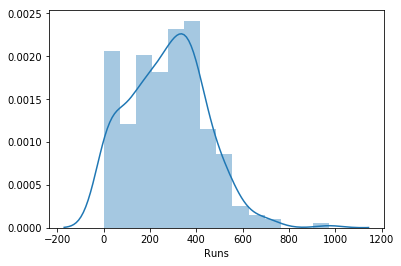

In [26]:
num_cols = ['BF', '4s', '6s', 'HS','Runs']
for i in range(0,len(num_cols),2):
    if len(num_cols) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(train[num_cols[i]], hist=True, kde=True)
        plt.subplot(122)            
        sns.distplot(train[num_cols[i+1]], hist=True, kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(train[num_cols[i]], hist=True, kde=True)

# from the above plot we can infer by KDE(kernel distribution estimator) smoth line that gives clear picture of the distribution

# below scatter plot describe the linear relationship of BF and Runs since Runs will be deciding factor for top 3 orange cap holder

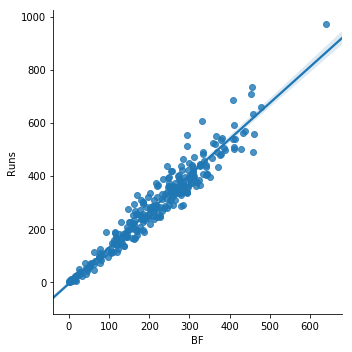

In [17]:
sns.lmplot('BF', 'Runs', data=train, fit_reg=True)

# similarly for other linear features

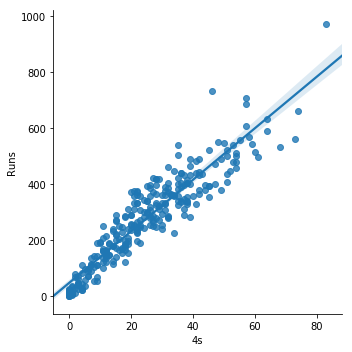

In [19]:
sns.lmplot('4s', 'Runs', data=train, fit_reg=True)
#from this we can infer it has some outliers

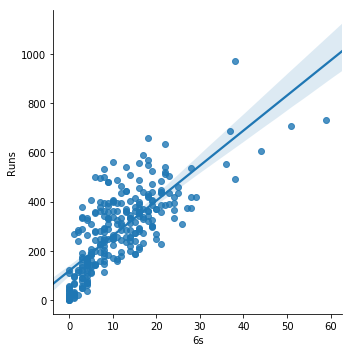

In [20]:
sns.lmplot('6s', 'Runs', data=train, fit_reg=True)
#its also has some outliers

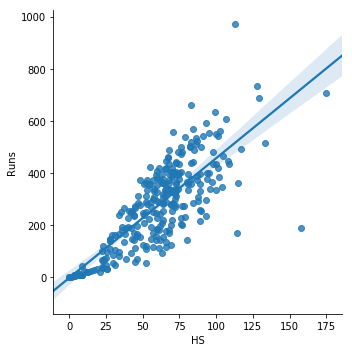

In [21]:
sns.lmplot('HS', 'Runs', data=train, fit_reg=True)

In [55]:
train.drop(['Runs'],axis=1,inplace=True)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
train.head()

,Year,Mat,No,HS,BF,SR,100,50,4s,6s,CT,ST
1,2017,16,4,61,250,116.00,0,1,15,16,10,3
2,2016,14,5,64,210,135.23,0,1,18,14,8,4
3,2015,17,5,53,305,121.96,0,1,27,17,8,3
4,2014,16,10,57,250,148.40,0,1,22,20,3,1
5,2013,18,5,67,283,162.89,0,4,32,25,15,2


In [62]:
X=train[['HS','BF','4s','6s']]

In [63]:
Y=train['Runs']

In [53]:
#here we can fit a multi linear regression model on these feature since the relationship is linear"


In [64]:
from sklearn import linear_model

In [65]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
y_pred = regr.predict(X)